In [1]:
from typing import Any

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

networkx - пакет, для манипулции графами, неплохая структура данных для хранения графов


имеет встроенные алгоритмы по типу DFS/BFS и тд


посзволяет удобно смотреть на компоненты графа


имеет минимальную визуализацию

Есть поддержка мультиграфов, неориентированных, ориентированных

<img src="https://i.stack.imgur.com/QWmUo.png">

In [2]:
def plot_graph(G):
    options = dict(
        font_size=12,
        node_size=500,
        node_color="white",
        edgecolors="black",
    )
    # Очень важно выбрать правильный layout
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, **options)
    
    if(nx.is_weighted(G)): # явно указываем что надо достать веса из G
        labels = {e: G.edges[e]["weight"] for e in G.edges}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [3]:
G = nx.Graph()
DG = nx.DiGraph() # ориентированныq

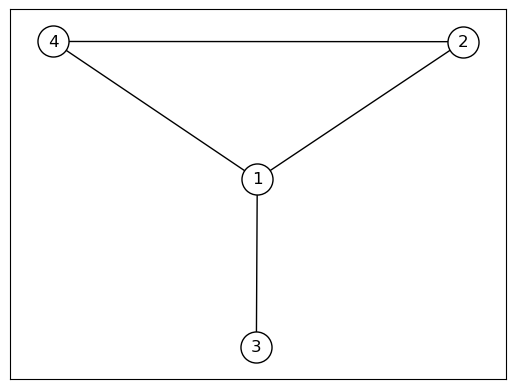

In [4]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(1,4)
G.add_edge(4,2)
plot_graph(G)

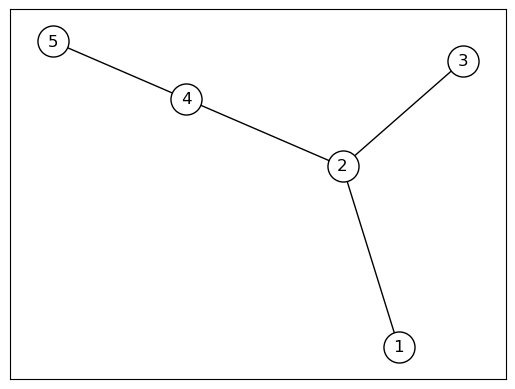

In [5]:
G = nx.Graph()
edges = [(1,2),(2,3),(2,4),(5,4)]
G.add_edges_from(edges)
plot_graph(G)

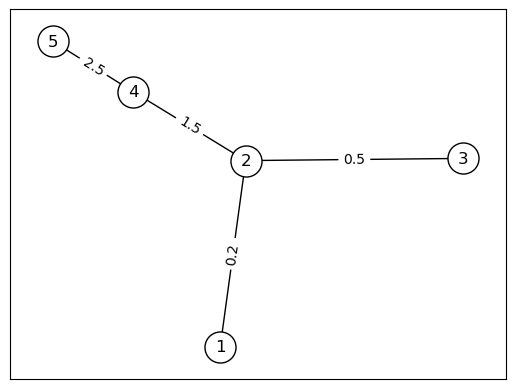

In [6]:
# Взвешанный граф
G = nx.Graph()
edges = (
    (1, 2, 0.2),
    (2, 3, 0.5),
    (2, 4, 1.5),
    (5, 4, 2.5),
)
G.add_weighted_edges_from(edges)
plot_graph(G)

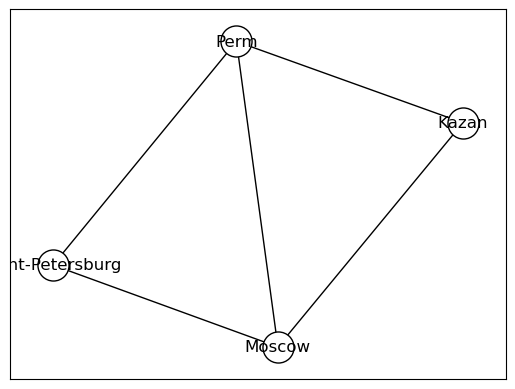

In [7]:
G = nx.Graph()
G.add_nodes_from((
    ("Moscow", dict(
        population=13.1
    )),
    ("Saint-Petersburg", dict(
        population=5.6
    )),
    ("Perm", dict(
        population=1.1
    )),
    ("Kazan", dict(
        population=5
    )),
))

G.add_edge("Moscow","Saint-Petersburg", distance=712)
G.add_edge("Moscow","Kazan", distance=216)
G.add_edge("Moscow","Perm", distance=150)
G.add_edge("Saint-Petersburg","Perm", distance=190)
G.add_edge("Kazan","Perm", distance=10)

plot_graph(G)

In [8]:
# Как ходить по графу?
len(G) # количество вершин

4

In [9]:
G.edges # количество связей

EdgeView([('Moscow', 'Saint-Petersburg'), ('Moscow', 'Kazan'), ('Moscow', 'Perm'), ('Saint-Petersburg', 'Perm'), ('Perm', 'Kazan')])

In [10]:
for n in G: #вершины
    print(n)

Moscow
Saint-Petersburg
Perm
Kazan


In [11]:
G.has_node("Novosibirsk")

False

In [12]:
G.has_node("Perm")

True

In [13]:
G.has_edge("Perm", "Saint-Petersburg")

True

In [14]:
G.has_edge("Kazan", "Saint-Petersburg")

False

# Ориентированная версия

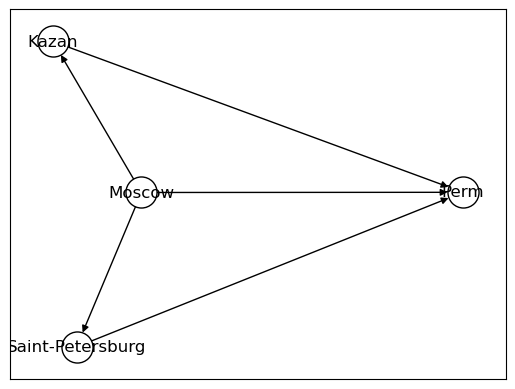

In [15]:
G = nx.DiGraph()
G.add_nodes_from((
    ("Moscow", dict(
        population=13.1
    )),
    ("Saint-Petersburg", dict(
        population=5.6
    )),
    ("Perm", dict(
        population=1.1
    )),
    ("Kazan", dict(
        population=5
    )),
))

G.add_edge("Moscow","Saint-Petersburg", distance=712)
G.add_edge("Moscow","Kazan", distance=216)
G.add_edge("Moscow","Perm", distance=150)
G.add_edge("Saint-Petersburg","Perm", distance=190)
G.add_edge("Kazan","Perm", distance=10)

plot_graph(G)

# Атрибуты

In [16]:
for e in G:
    print(e)

Moscow
Saint-Petersburg
Perm
Kazan


In [17]:
for e in G.edges.data():
    print(e)

('Moscow', 'Saint-Petersburg', {'distance': 712})
('Moscow', 'Kazan', {'distance': 216})
('Moscow', 'Perm', {'distance': 150})
('Saint-Petersburg', 'Perm', {'distance': 190})
('Kazan', 'Perm', {'distance': 10})


In [18]:
for e in G.edges.data("distance"):
    print(e)

('Moscow', 'Saint-Petersburg', 712)
('Moscow', 'Kazan', 216)
('Moscow', 'Perm', 150)
('Saint-Petersburg', 'Perm', 190)
('Kazan', 'Perm', 10)


In [19]:
for e in G.neighbors("Moscow"): # из москвы куда то
    print(e)

Saint-Petersburg
Kazan
Perm


# Вывод/чтение из файла

In [20]:
G = nx.Graph()
edges = (
    (1, 2, 0.2),
    (2, 3, 0.5),
    (2, 4, 1.5),
    (5, 4, 2.5),
)
G.add_weighted_edges_from(edges)

nx.write_adjlist(G, "test_savefile_matrix.adjlist") # сохранили как матрицу смежности
nx.write_edgelist(G, "test_savefile_dict.edgelist") # сохранили как список смежности

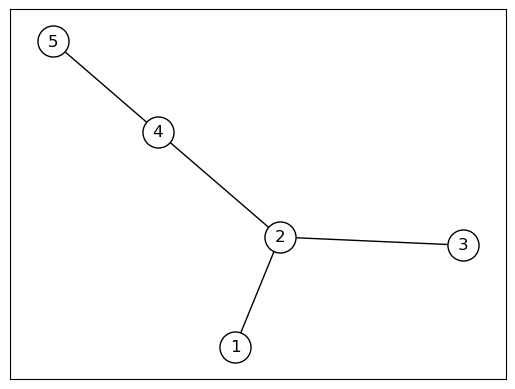

In [21]:
plot_graph(nx.read_adjlist("test_savefile_matrix.adjlist"))


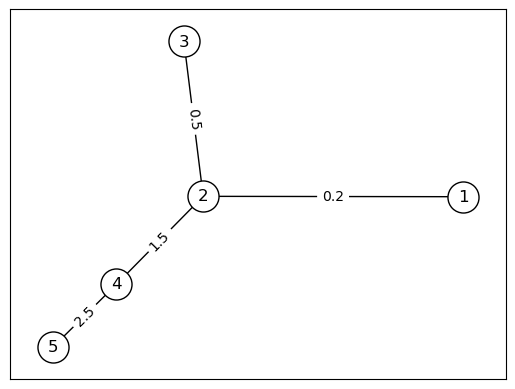

In [22]:
plot_graph(nx.read_edgelist("test_savefile_dict.edgelist"))

# Генерация графов

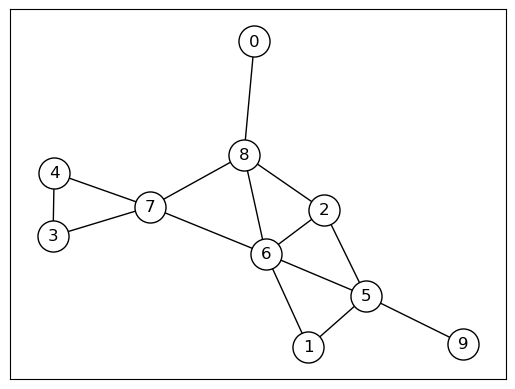

In [23]:
G = nx.erdos_renyi_graph(n=10,p=0.2) # кол-во узлов, вероятность появления связи
plot_graph(G)

Напишите функцию вычисляющую степень соседей для каждого из узлов, у которых вообще есть соседи

In [24]:
degrees = [degree for (node, degree) in G.degree()] # просто вычисляем степень каждой вершины
degrees

[1, 2, 3, 2, 2, 4, 5, 4, 4, 1]

In [25]:
def get_degrees(G) -> dict[Any,Any]:
    data = {}
    for i in G.nodes():
        if(G.degree(i)):
            data[i] = np.mean([G.degree(j) for j in G[i]])
    return data

In [26]:
get_degrees(G) # у нуля только один сосед, у которого 5 ребер

{0: 4.0,
 1: 4.5,
 2: 4.333333333333333,
 3: 3.0,
 4: 3.0,
 5: 2.75,
 6: 3.4,
 7: 3.25,
 8: 3.25,
 9: 4.0}

0.924 15


Text(0.5, 0, 'probabilty of edges to appear')

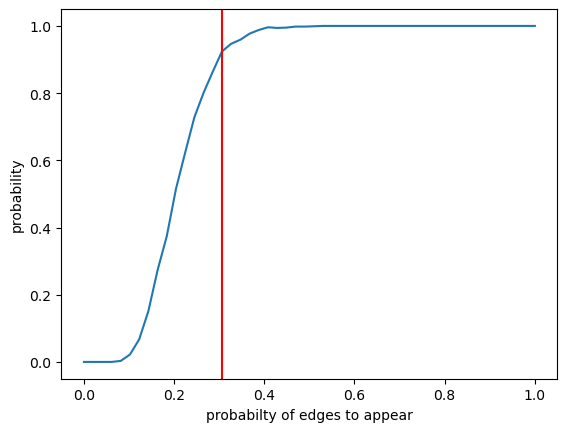

In [27]:
setka_p = np.linspace(0,1,50)
probab_arr = list()
for prob in setka_p:
    sum_cases_of_death = 0
    for iteration in range(1000):
        G = nx.erdos_renyi_graph(n=15, p=prob)
        if(nx.number_connected_components(G) == 1):
            sum_cases_of_death += 1
    probab_arr.append(sum_cases_of_death/1000)
    

for j in probab_arr:
    if(j >= 0.9): 
        print(j, probab_arr.index(j))
        x_crit = setka_p[probab_arr.index(j)]
        break
        
plt.plot(setka_p,probab_arr)
plt.axvline(x = x_crit, color = 'r')
plt.ylabel("probability")
plt.xlabel("probabilty of edges to appear")

In [28]:
# Решение першина
def estimate_connectivity_probability(n, p, n_trials):
    is_connected = np.zeros((n_trials,), dtype=np.int_)
    for i in range(n_trials):
        G = nx.erdos_renyi_graph(n=n, p=p)
        is_connected[i] = nx.is_connected(G)
    return np.mean(is_connected)

In [29]:
# Решение першина
def plot_percolation_curve(n):
    p = np.linspace(0,1,20)
    connectivity_probabilities = np.zeros_like(p, dtype=np.float_)
    n_trials = 1000
    for i in range(len(p)):
        connectivity_probabilities[i] = estimate_connectivity_probability(
            n=n,
            p=p[i],
            n_trials=n_trials
        )
    fig, ax = plt.subplots(1, 1, figsize =(6, 4))
    ax.plot(p, connectivity_probabilities, "o--")
    ax.set_xlabel(r"$p$", fontsize=12)
    ax.set_ylabel(r"$p_{perc}$", fontsize=12)
    fig.tight_layout()
    plt.show()

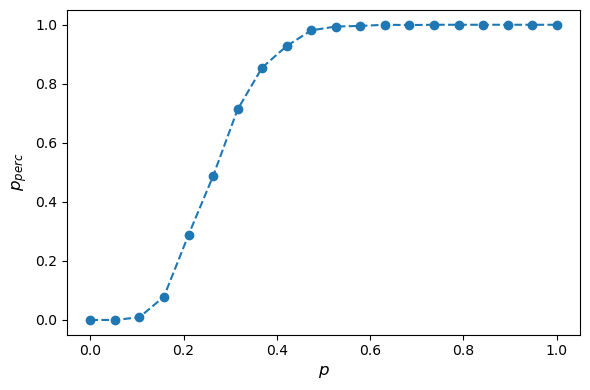

In [30]:
plot_percolation_curve(10)

# АЛГОРИТМЫ

## DFS ( рекурсия + итерация )